# Homework

## Numerical Disposal

**Week4 : 수치형 변수 처리**

log1p, date, scaling, binning, polynomial regression

In [20]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [21]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [22]:
data_dir = Path('./data/movies/')
trn_file = data_dir / 'movies_train.csv'
seed = 42

In [23]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.head()

(600, 11)


,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.1616e+06,2,387,3,7072501
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.2078e+05,4,343,4,6959083
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.3894e+04,2,20,6,217866
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0000e+00,1,251,2,483387


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   release_time    600 non-null    object 
 3   time            600 non-null    int64  
 4   screening_rat   600 non-null    object 
 5   director        600 non-null    object 
 6   dir_prev_bfnum  270 non-null    float64
 7   dir_prev_num    600 non-null    int64  
 8   num_staff       600 non-null    int64  
 9   num_actor       600 non-null    int64  
 10  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 56.2+ KB


`dir_prev_bfnum`은 결측값이 많아 NaN 값을 0으로 대치

In [25]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   release_time    600 non-null    object 
 3   time            600 non-null    int64  
 4   screening_rat   600 non-null    object 
 5   director        600 non-null    object 
 6   dir_prev_bfnum  600 non-null    float64
 7   dir_prev_num    600 non-null    int64  
 8   num_staff       600 non-null    int64  
 9   num_actor       600 non-null    int64  
 10  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 56.2+ KB


In [26]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0000,6.0000e+02,600.0000,600.0000,600.0000,6.0000e+02
mean,100.8633,4.7270e+05,0.8767,151.1183,3.7067,7.0818e+05
std,18.0975,1.3095e+06,1.1834,165.6547,2.4469,1.8280e+06
min,45.0000,0.0000e+00,0.0000,0.0000,0.0000,1.0000e+00
25%,89.0000,0.0000e+00,0.0000,17.0000,2.0000,1.2972e+03
50%,100.0000,0.0000e+00,0.0000,82.5000,3.0000,1.2591e+04
75%,114.0000,3.7614e+05,2.0000,264.0000,4.0000,4.7989e+05
max,180.0000,1.7615e+07,5.0000,869.0000,25.0000,1.4263e+07


In [27]:
target_col = 'box_off_num'
pred_col = 'pred'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']


<AxesSubplot:>

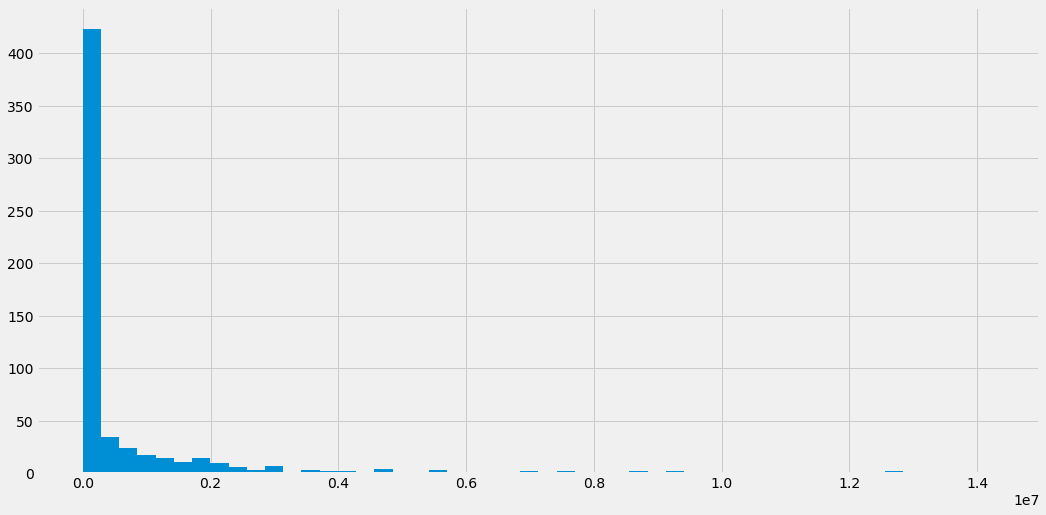

In [28]:
df.box_off_num.hist(bins=50)

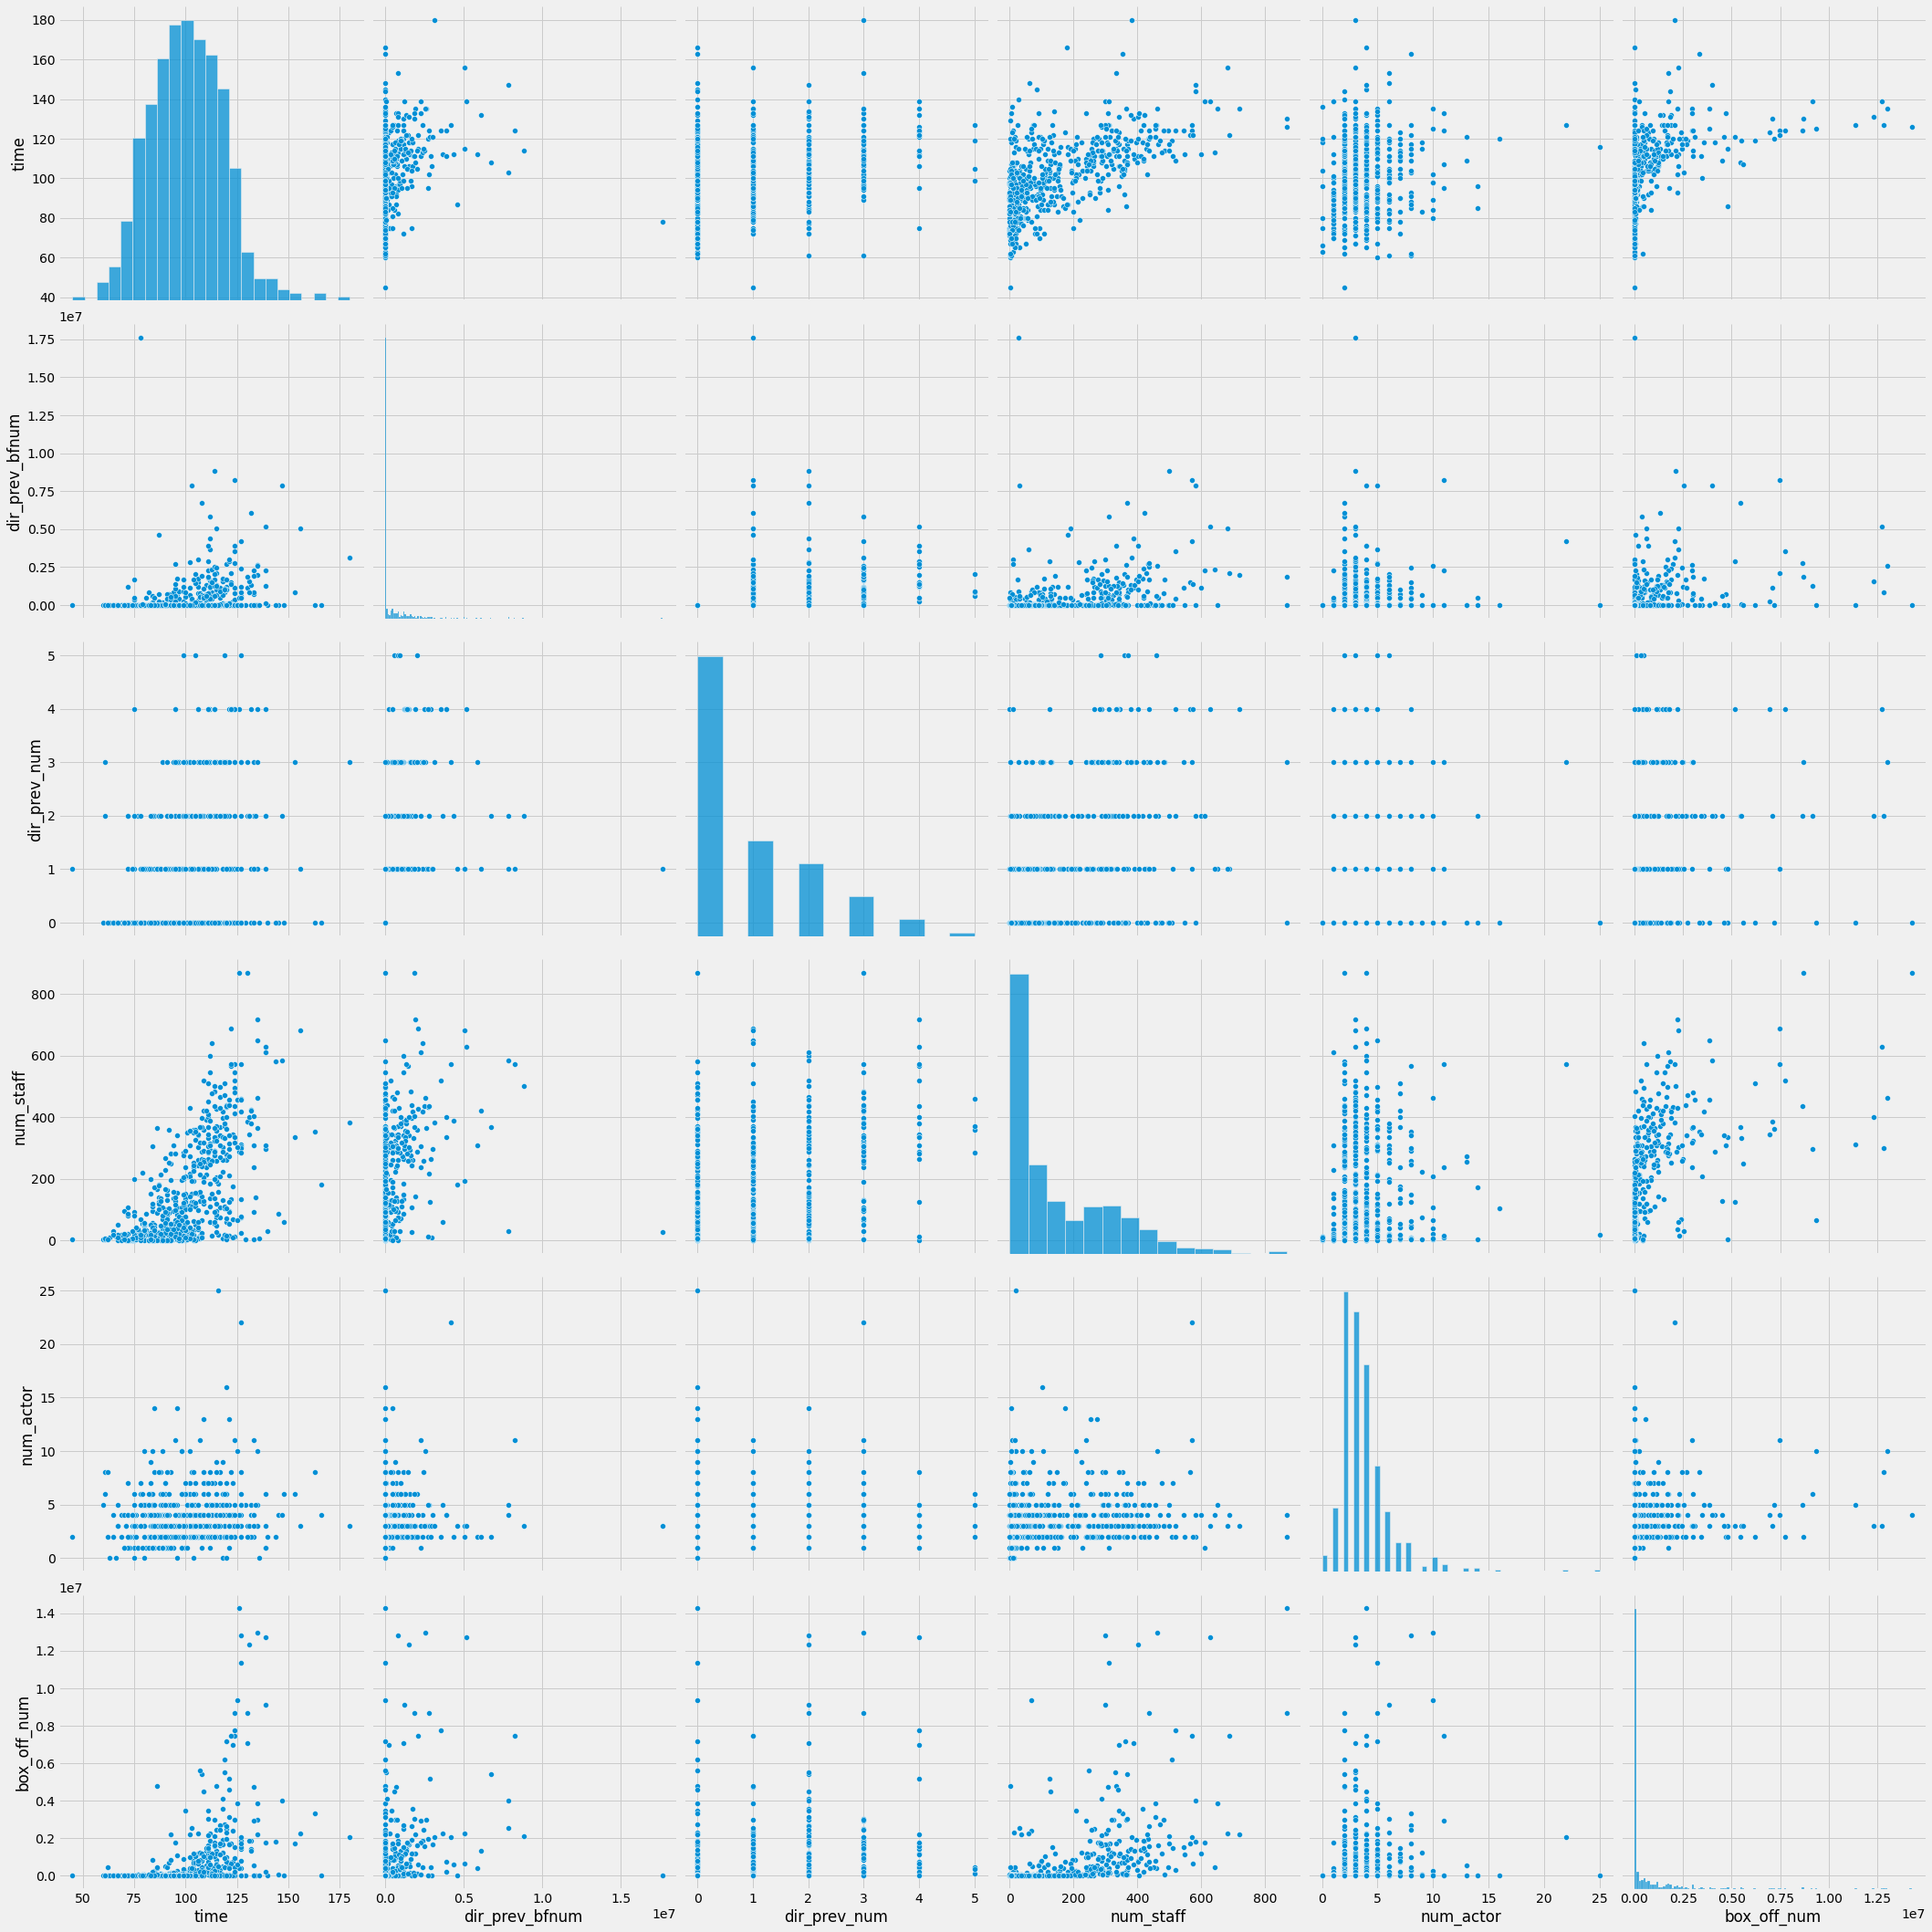

In [29]:
sns.pairplot(data=df, vars=num_cols + [target_col], size=5)

In [30]:
df.corr().style.background_gradient()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0000,0.2661,0.3067,0.6232,0.1142,0.4415
dir_prev_bfnum,0.2661,1.0000,0.3966,0.3697,0.0425,0.2938
dir_prev_num,0.3067,0.3966,1.0000,0.4507,0.0140,0.2597
num_staff,0.6232,0.3697,0.4507,1.0000,0.0779,0.5443
num_actor,0.1142,0.0425,0.0140,0.0779,1.0000,0.1112
box_off_num,0.4415,0.2938,0.2597,0.5443,0.1112,1.0000


## Linear Regression Loss func

In [31]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

In [32]:
# Model with no variable process
lr = LinearRegression()
lr.fit(df[num_cols], df[target_col])
df[pred_col] = lr.predict(df[num_cols])

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  1500066.43


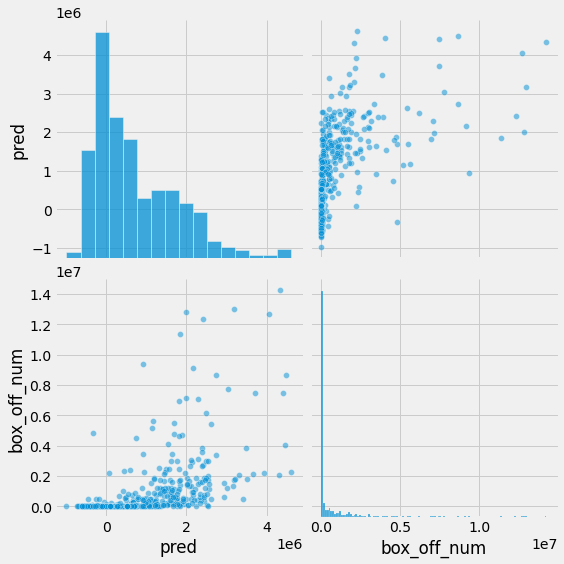

In [33]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

## `log1p` 멱함수 분포

<AxesSubplot:>

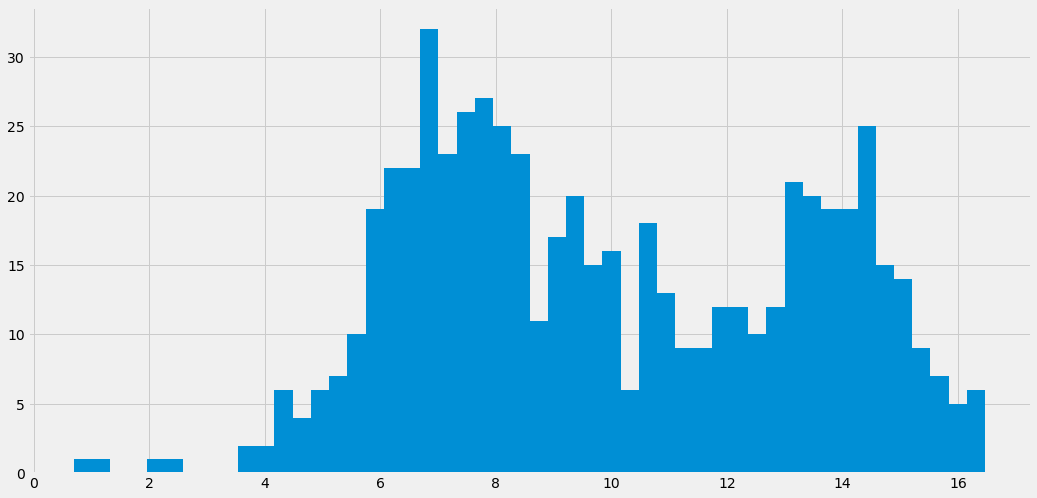

In [34]:
df.box_off_num.apply(np.log1p).hist(bins=50)

`np.log1p()` 함수 적용으로 정규분포로 변환가능. 역변환은 `np.expm1()` 으로 exponential 역함수 활용

In [35]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	 17129211.69
RMLSE:	        2.12


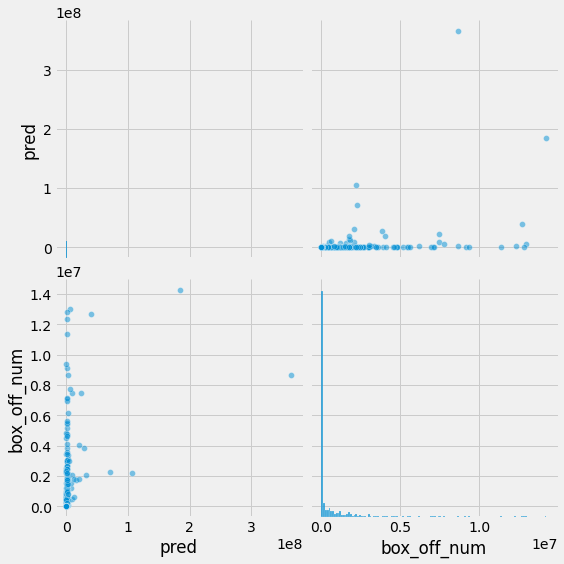

In [36]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

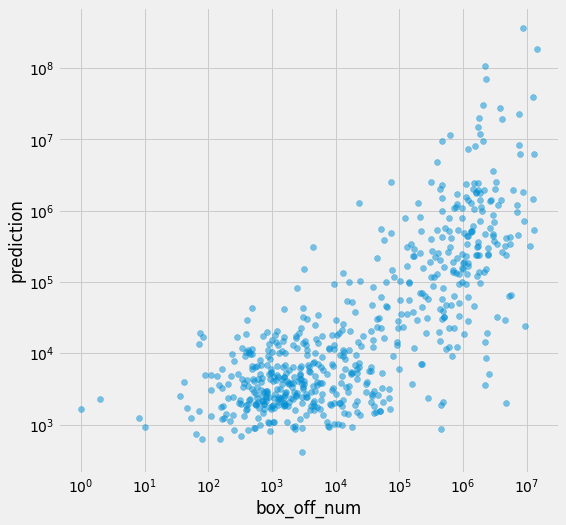

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [38]:
df[num_cols].describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,600.0000,6.0000e+02,600.0000,600.0000,600.0000
mean,100.8633,4.7270e+05,0.8767,151.1183,3.7067
std,18.0975,1.3095e+06,1.1834,165.6547,2.4469
min,45.0000,0.0000e+00,0.0000,0.0000,0.0000
25%,89.0000,0.0000e+00,0.0000,17.0000,2.0000
50%,100.0000,0.0000e+00,0.0000,82.5000,3.0000
75%,114.0000,3.7614e+05,2.0000,264.0000,4.0000
max,180.0000,1.7615e+07,5.0000,869.0000,25.0000


In [39]:
# log1p 적용
df[['dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']] = df[['dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']].apply(np.log1p)
df[num_cols].describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,600.0000,600.0000,600.0000,600.0000,600.0000
mean,100.8633,5.3058,0.4622,4.0264,1.4461
std,18.0975,6.2546,0.5556,1.7895,0.4463
min,45.0000,0.0000,0.0000,0.0000,0.0000
25%,89.0000,0.0000,0.0000,2.8904,1.0986
50%,100.0000,0.0000,0.0000,4.4248,1.3863
75%,114.0000,12.8376,1.0986,5.5797,1.6094
max,180.0000,16.6843,1.7918,6.7685,3.2581


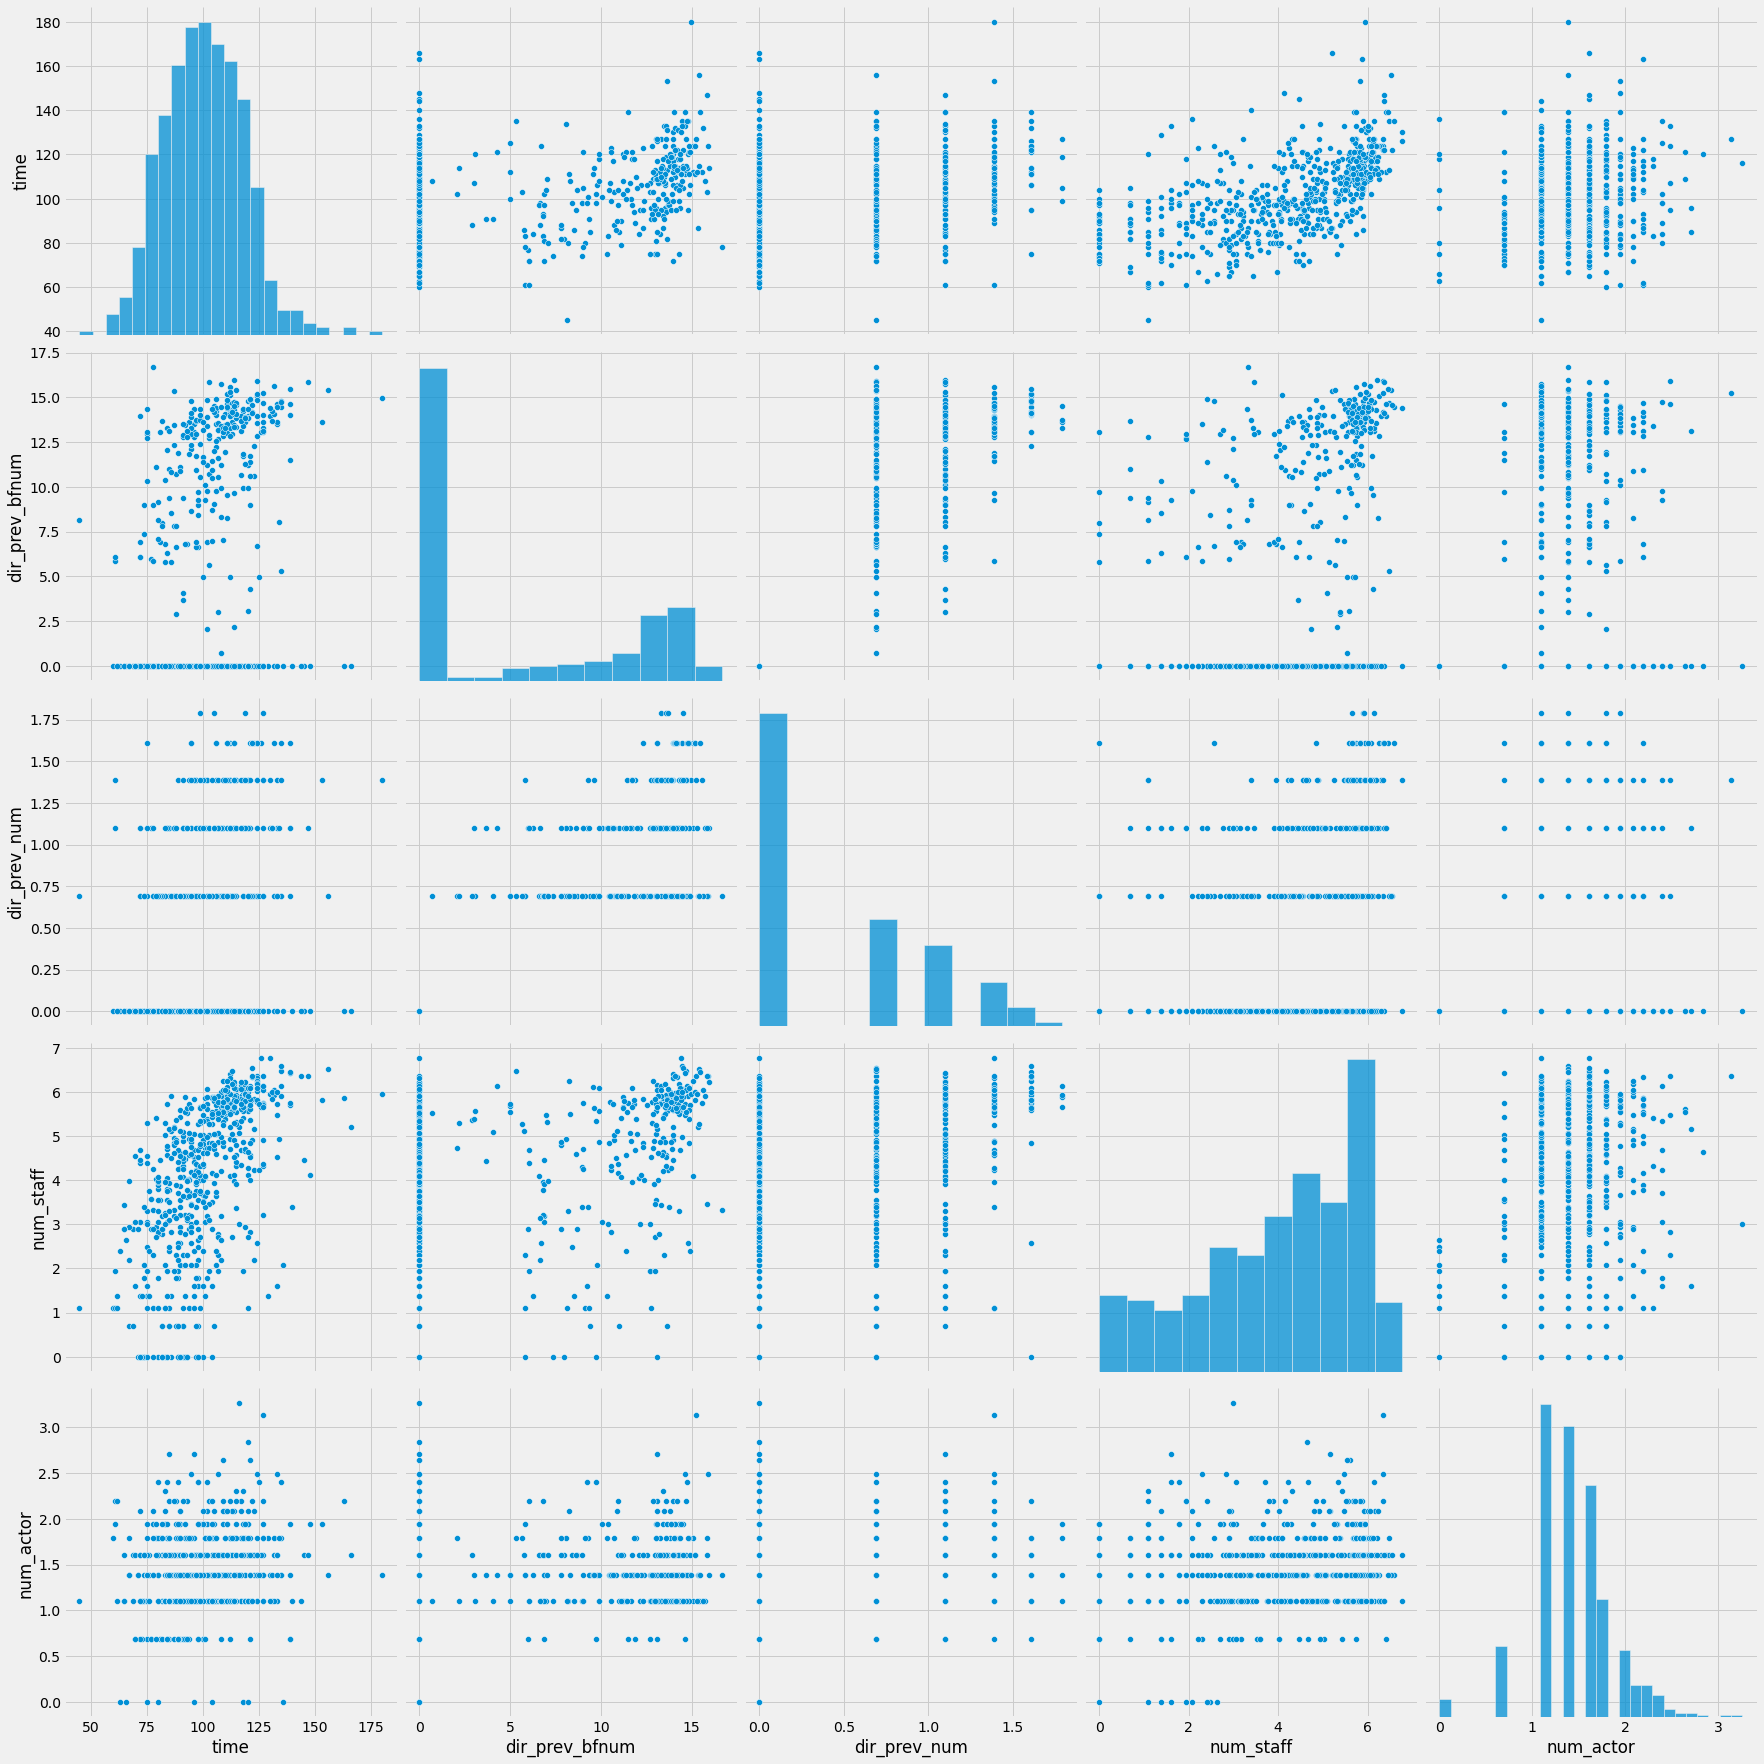

In [40]:
sns.pairplot(data=df, vars=num_cols, size=5)

In [41]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

# RMLSE는 나빠졌지만 RMSE는 더 좋은 수치

 RMSE:	  1883568.88
RMLSE:	        2.32


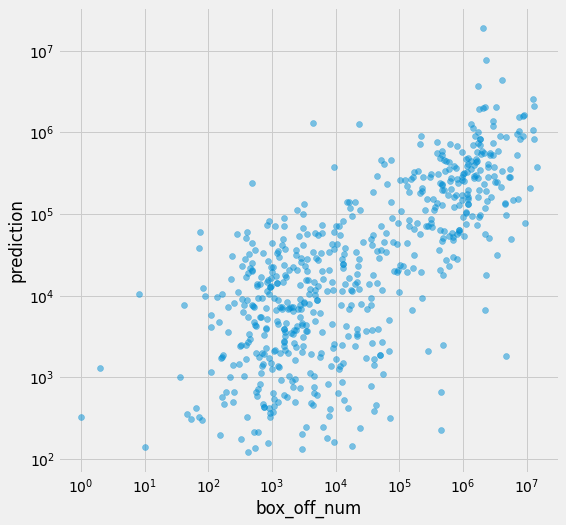

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [43]:
df.head()

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,pred
title,,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0000,0.0000,4.5218,1.0986,23398,12093.4384
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,13.9653,1.0986,5.9610,1.3863,7072501,963891.1492
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,12.3049,1.6094,5.8406,1.6094,6959083,521738.2595
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,10.0814,1.0986,3.0445,1.9459,217866,19533.2981
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,0.6931,0.6931,5.5294,1.0986,483387,50007.2669


## 날짜/시간 변수 처리

In [44]:
df['release_time'] = pd.to_datetime(df['release_time'])
df['release_time'].describe()

count                     600
unique                    330
top       2015-08-13 00:00:00
freq                        6
first     2010-01-02 00:00:00
last      2015-12-31 00:00:00
Name: release_time, dtype: object

In [45]:
df['year'] = df['release_time'].dt.year
df['month'] = df['release_time'].dt.month
df.head()

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,pred,year,month
title,,,,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0000,0.0000,4.5218,1.0986,23398,12093.4384,2012,11
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,13.9653,1.0986,5.9610,1.3863,7072501,963891.1492,2015,11
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,12.3049,1.6094,5.8406,1.6094,6959083,521738.2595,2013,6
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,10.0814,1.0986,3.0445,1.9459,217866,19533.2981,2012,7
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,0.6931,0.6931,5.5294,1.0986,483387,50007.2669,2010,11


In [46]:
# X값에 year, month 추가
num_cols += ['year', 'month']
print(num_cols)

['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'year', 'month']


In [47]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  1893420.63
RMLSE:	        2.31


## Binning

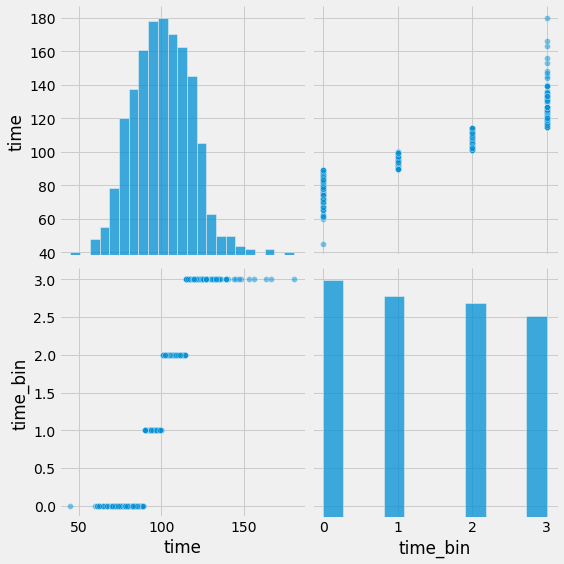

In [48]:
# time column binning column 추가
df['time_bin'] = pd.qcut(df['time'], 4, labels=False)
sns.pairplot(data=df, vars=['time', 'time_bin'], size=4, plot_kws={'alpha': .5})

In [49]:
# time, time_bin column 출력
df['time_bin'] = pd.qcut(df['time'], 4, labels=False)
df[['time', 'time_bin']].head(10)

,time,time_bin
title,,
개들의 전쟁,96,1
내부자들,130,3
은밀하게 위대하게,123,3
나는 공무원이다,101,2
불량남녀,108,2
강철대오 : 구국의 철가방,113,2
길위에서,104,2
회사원,96,1
"1789, 바스티유의 연인들",129,3


In [50]:
# time column
X = pd.concat([df[num_cols], pd.get_dummies(pd.qcut(df['time'], 4, labels=False))], axis=1)
X.shape

(600, 11)

In [51]:
pd.DataFrame(X)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month,0,1,2,3
title,,,,,,,,,,,
개들의 전쟁,96,0.0000,0.0000,4.5218,1.0986,2012,11,0,1,0,0
내부자들,130,13.9653,1.0986,5.9610,1.3863,2015,11,0,0,0,1
은밀하게 위대하게,123,12.3049,1.6094,5.8406,1.6094,2013,6,0,0,0,1
나는 공무원이다,101,10.0814,1.0986,3.0445,1.9459,2012,7,0,0,1,0
불량남녀,108,0.6931,0.6931,5.5294,1.0986,2010,11,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
해무,111,8.2517,0.6931,6.2364,2.0794,2014,8,0,0,1,0
파파로티,127,13.1145,0.6931,5.6595,1.9459,2013,3,0,0,0,1
살인의 강,99,0.0000,0.0000,4.8203,1.6094,2010,9,0,1,0,0


In [52]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  1730191.35
RMLSE:	        2.25


In [53]:
X = pd.concat([df[[x for x in num_cols if x != 'month']], 
               pd.get_dummies(pd.qcut(df['time'], 4, labels=False)),
               pd.get_dummies(df['month'])], axis=1)
X.shape

(600, 22)

In [54]:
pd.DataFrame(X)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,0,1,2,3,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,,,,,,,,,,
개들의 전쟁,96,0.0000,0.0000,4.5218,1.0986,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
내부자들,130,13.9653,1.0986,5.9610,1.3863,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
은밀하게 위대하게,123,12.3049,1.6094,5.8406,1.6094,2013,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
나는 공무원이다,101,10.0814,1.0986,3.0445,1.9459,2012,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
불량남녀,108,0.6931,0.6931,5.5294,1.0986,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해무,111,8.2517,0.6931,6.2364,2.0794,2014,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
파파로티,127,13.1145,0.6931,5.6595,1.9459,2013,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
살인의 강,99,0.0000,0.0000,4.8203,1.6094,2010,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
# 
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  1693164.29
RMLSE:	        2.22


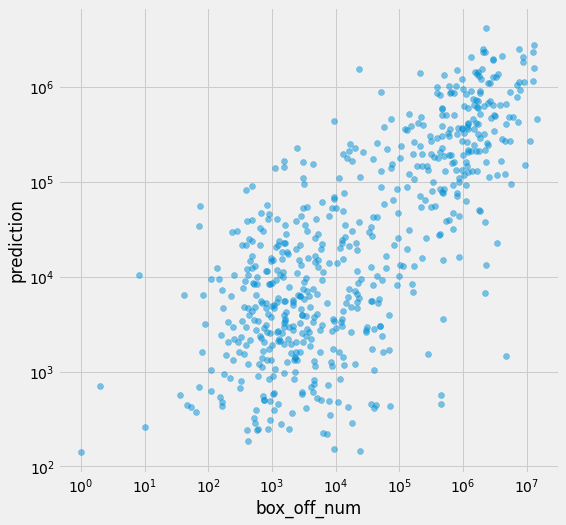

In [56]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

## 2차 Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(df[num_cols])
print(X.shape)

(600, 36)


In [59]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  2925429.83
RMLSE:	        2.00


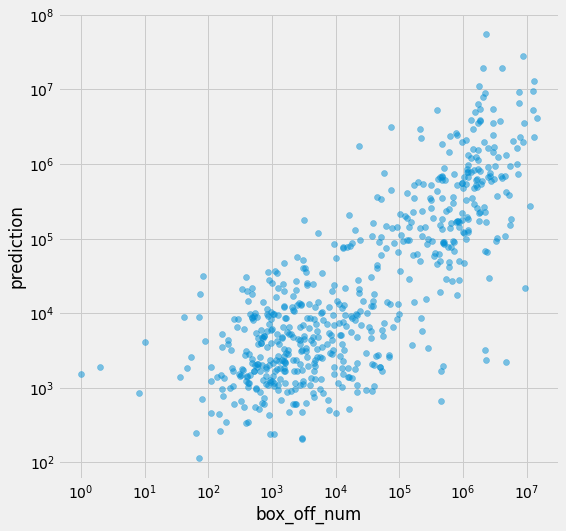

In [60]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')